<a href="https://colab.research.google.com/github/danjp93/msds_498_insurance_loss_modeling/blob/main/GLM_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.1/203.1 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.5 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=2a0b4a7647e4e98e0115637a23717c66cbd78545fce95882b61eee57fda7697a
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [3]:
import wandb
wandb.login(relogin = True)

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [4]:
run = wandb.init()
datas = run.use_artifact('msds_498_claims_modeling/claims_modeling/sythetic_data:v5')
directory = datas.download(root = 'datasets')

wandb: Currently logged in as: danielpallotta2023 (msds_498_claims_modeling). Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact sythetic_data:v5, 153.76MB. 3 files... 
wandb:   3 of 3 files downloaded.  
Done. 0:0:1.9


In [5]:
!pip install pyarrow
!pip install pandas
!pip install fastparquet
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pyarrow
import fastparquet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [7]:
targets = ['vehicle_claim_cnt_all_0','vehicle_claim_cnt_coll_0','vehicle_claim_cnt_bi_0', \
          'vehicle_claim_cnt_comp_0']
vars = ['vehicle_age', 'annual_mileage', 'vehicle_type', 'max_driver_age', 'min_driver_age',\
        'mean_driver_age', 'min_driver_tenure', 'youthful_driver_count', 'credit_score', 'garaging_location',\
        'household_tenure','multiline_houses', 'multiline_personal_article_policy', \
        'multiline_personal_liability_umbrella', 'multiline_rental', 'vehicle_count','vehicle_claim_time_since_all', \
        'driver_count','coverage_bi','coverage_coll','coverage_comp','coverage_ers','coverage_mpc','coverage_pd','coverage_ubi'
      ]

train_df = pd.read_parquet('./datasets/split=train')
columns_to_keep = targets + vars
train_df = train_df[columns_to_keep]

In [8]:
test_df = pd.read_parquet('./datasets/split=test')
test_df = test_df[columns_to_keep]

In [9]:
print(train_df.shape)
print(test_df.shape)

(220383, 29)
(63652, 29)


In [10]:
train_df = train_df.astype({
    'coverage_bi': int,
    'coverage_coll': int,
    'coverage_comp': int,
    'coverage_ers': int,
    'coverage_mpc': int,
    'coverage_pd': int,
    'coverage_ubi': int
})

test_df = test_df.astype({
    'coverage_bi': int,
    'coverage_coll': int,
    'coverage_comp': int,
    'coverage_ers': int,
    'coverage_mpc': int,
    'coverage_pd': int,
    'coverage_ubi': int
})

Target: vehicle_claim_cnt_all_0

Variable: vehicle_age


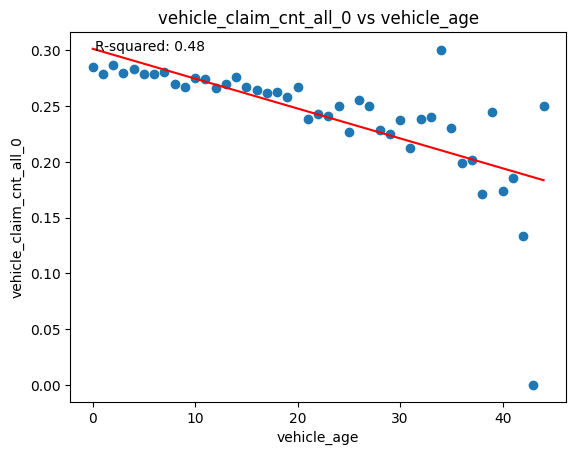


Variable: annual_mileage


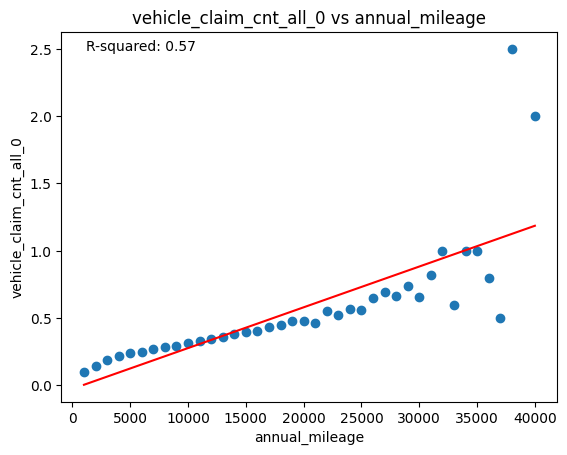


Variable: max_driver_age


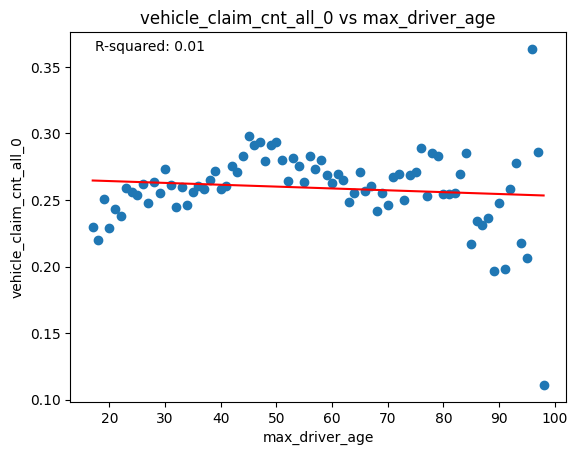


Variable: min_driver_age


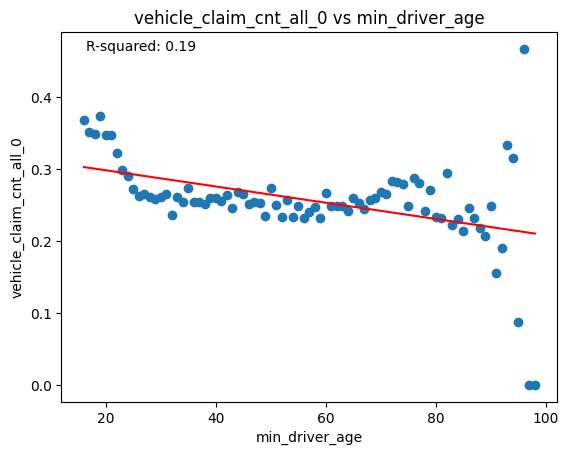


Variable: mean_driver_age


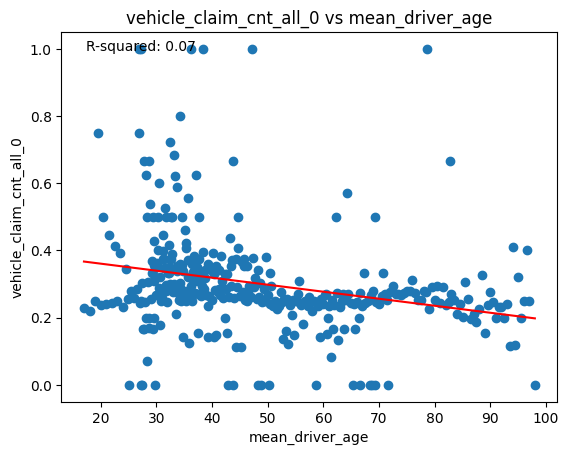


Variable: min_driver_tenure


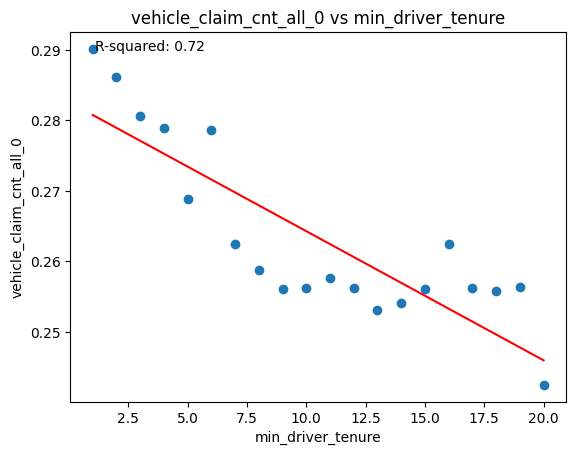


Variable: youthful_driver_count


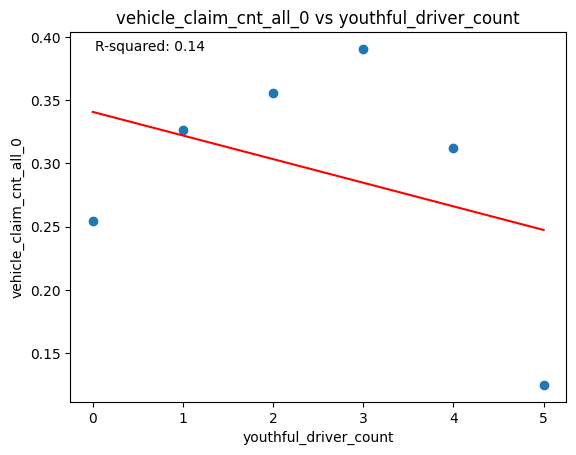


Variable: credit_score


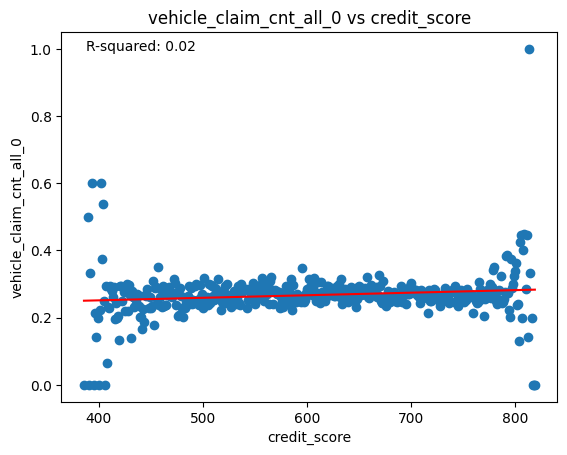


Variable: household_tenure


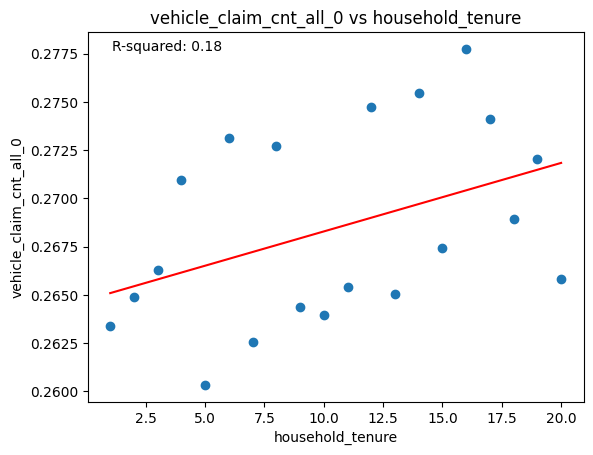


Variable: multiline_houses


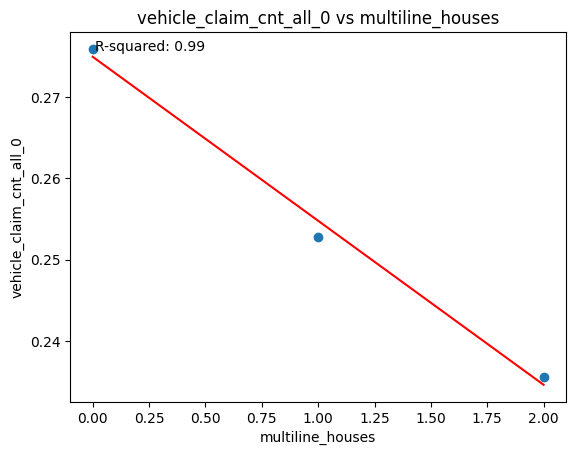


Variable: multiline_personal_article_policy


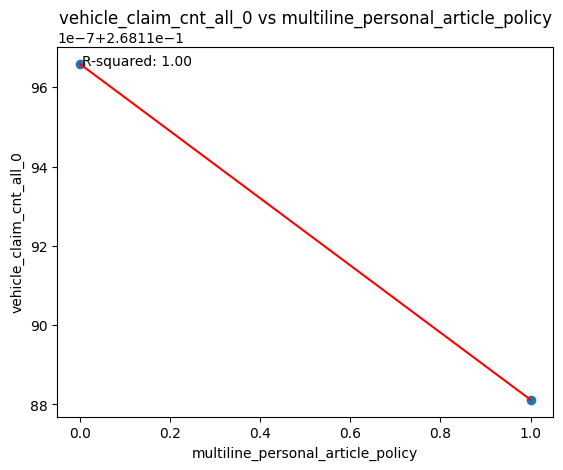


Variable: multiline_personal_liability_umbrella


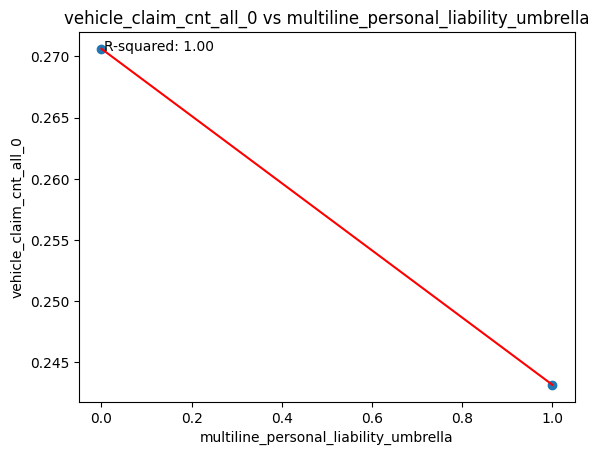


Variable: multiline_rental


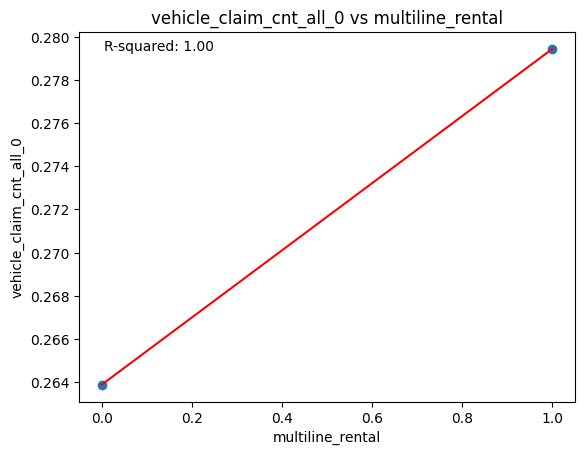


Variable: vehicle_count


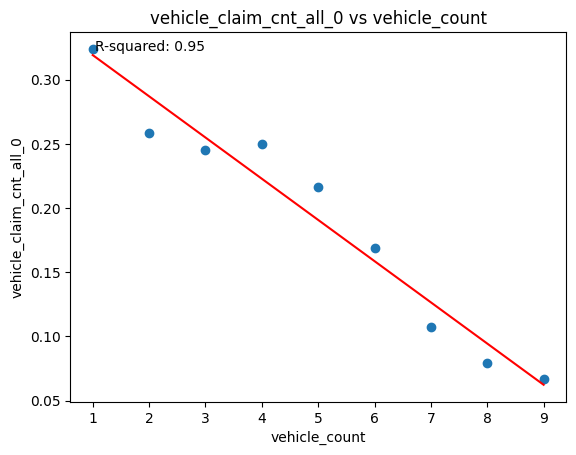


Variable: vehicle_claim_time_since_all


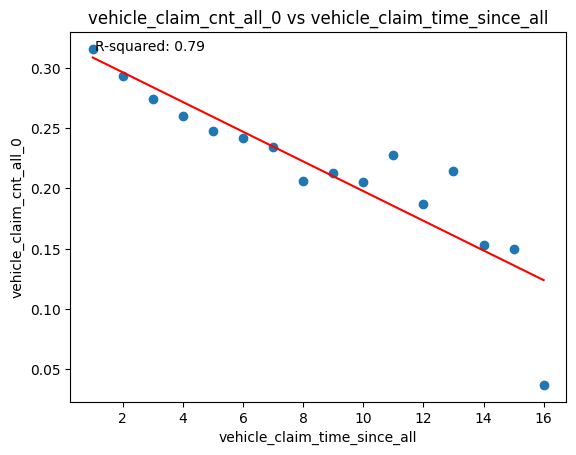


Variable: driver_count


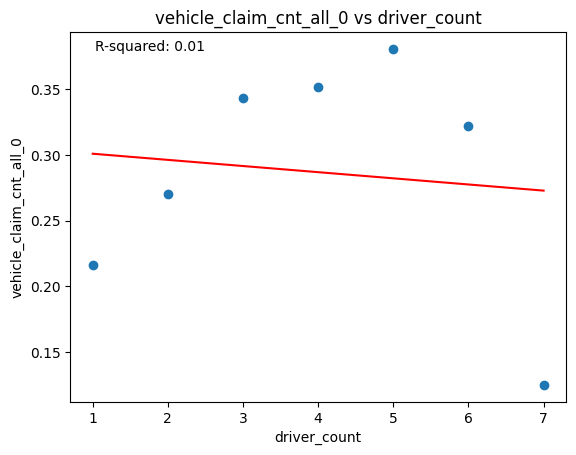


Variable: coverage_bi


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


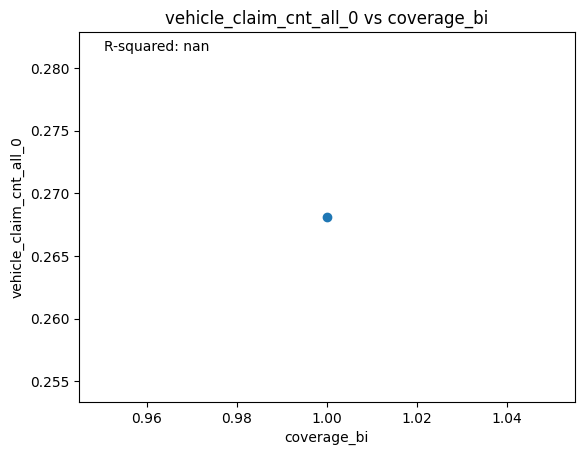


Variable: coverage_coll


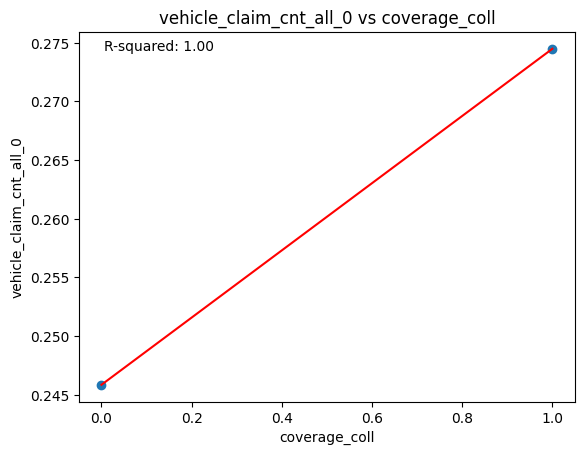


Variable: coverage_comp


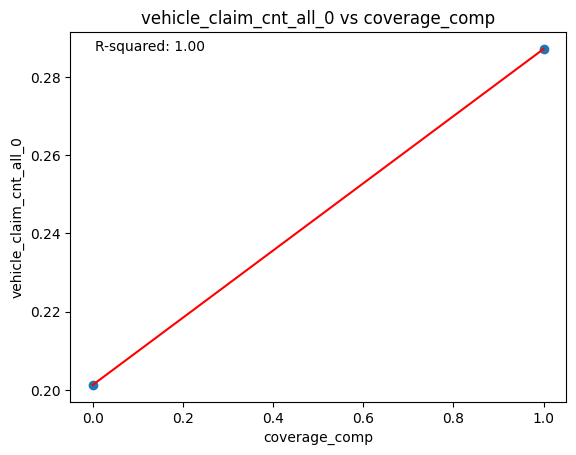


Variable: coverage_ers


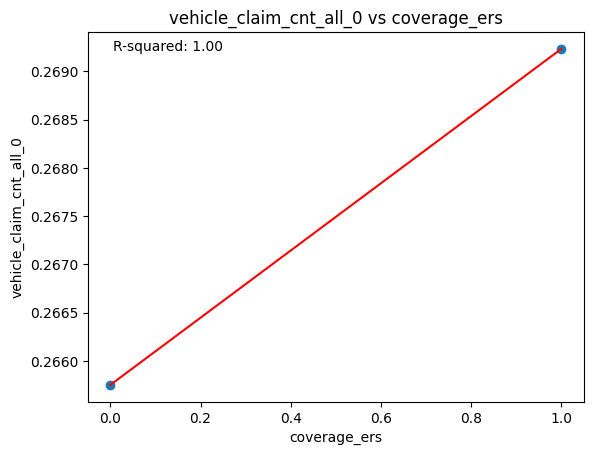


Variable: coverage_mpc


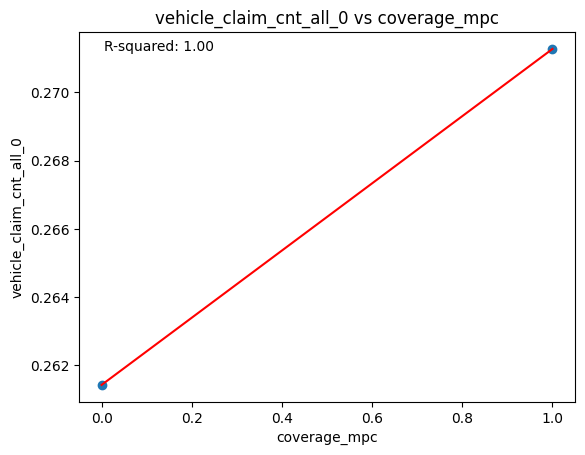


Variable: coverage_pd


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


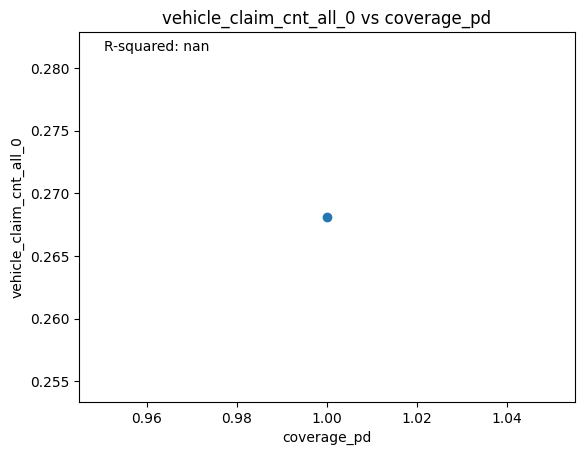


Variable: coverage_ubi


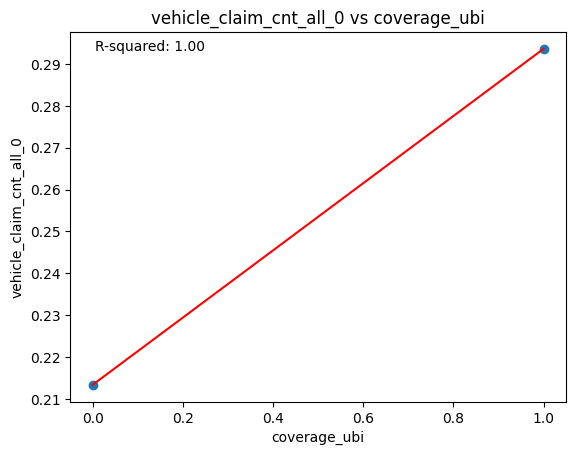

Target: vehicle_claim_cnt_coll_0

Variable: vehicle_age


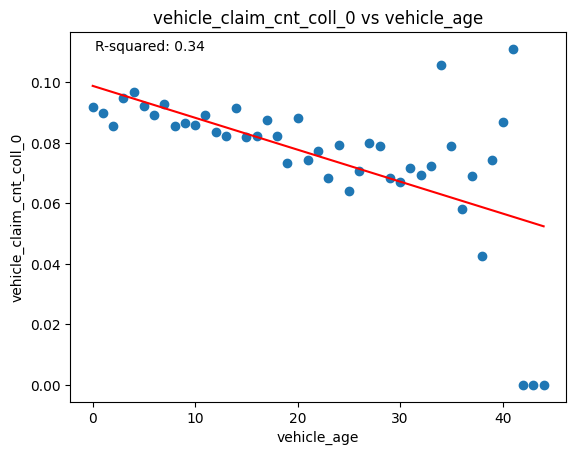


Variable: annual_mileage


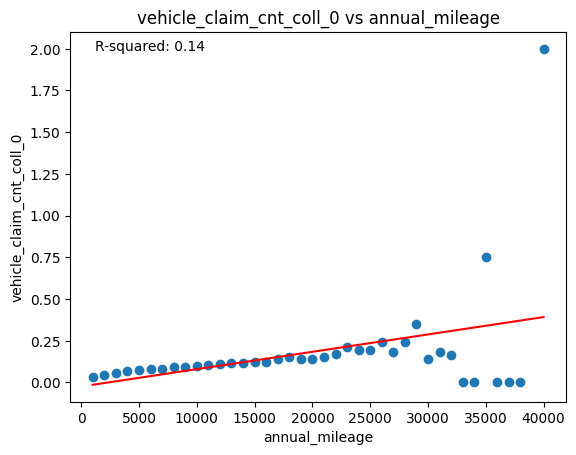


Variable: max_driver_age


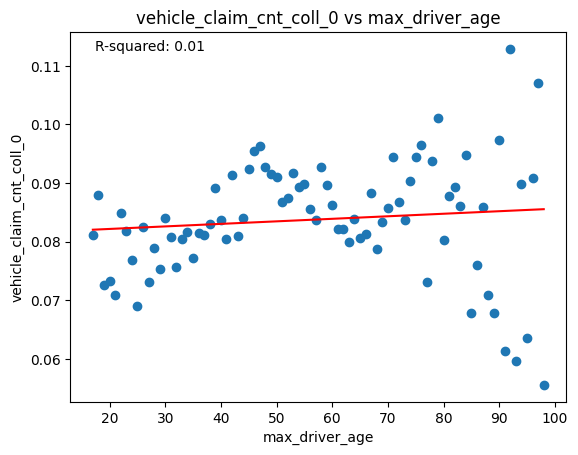


Variable: min_driver_age


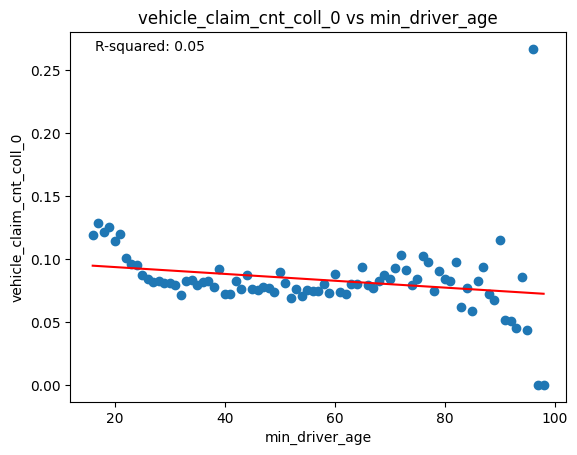


Variable: mean_driver_age


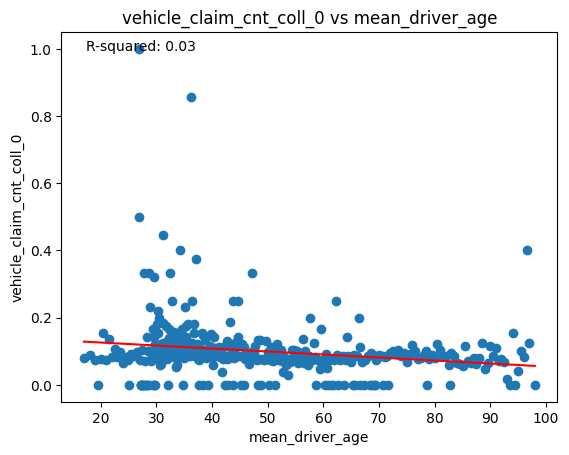


Variable: min_driver_tenure


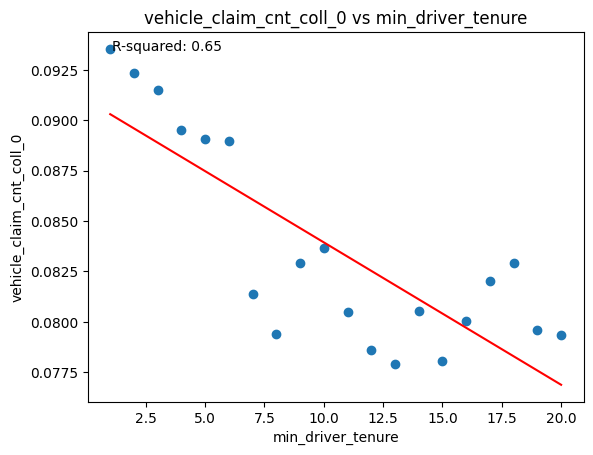


Variable: youthful_driver_count


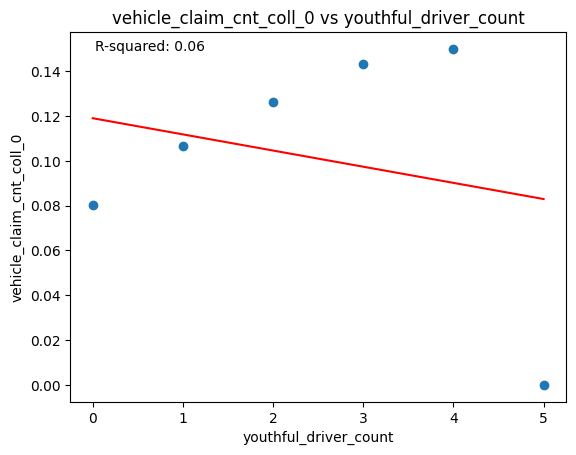


Variable: credit_score


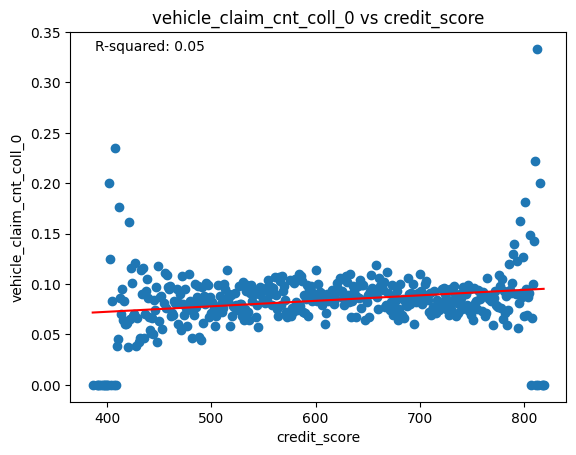


Variable: household_tenure


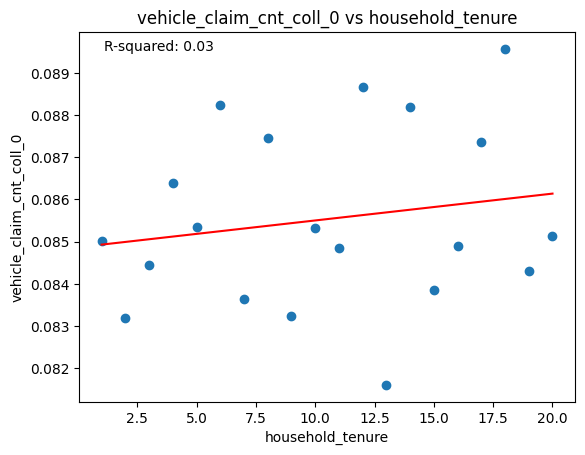


Variable: multiline_houses


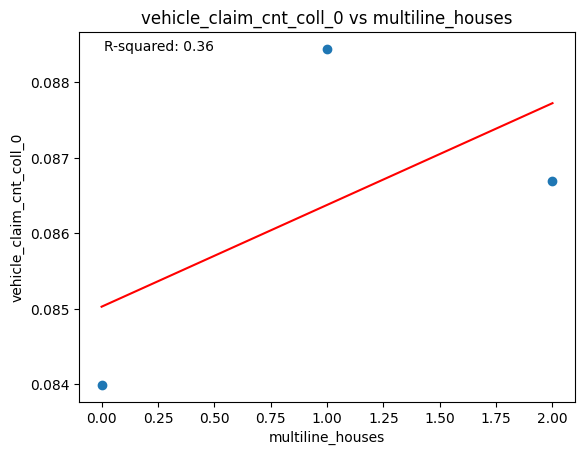


Variable: multiline_personal_article_policy


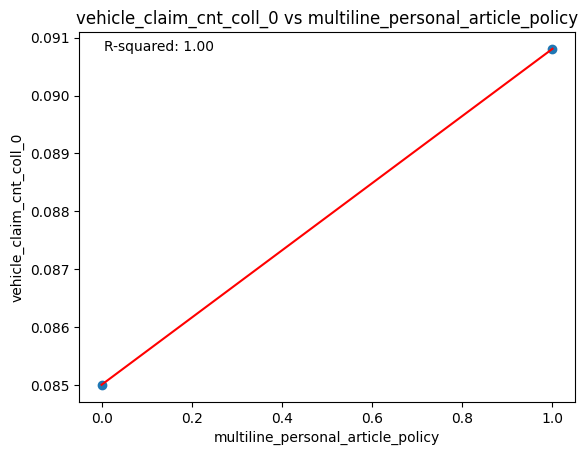


Variable: multiline_personal_liability_umbrella


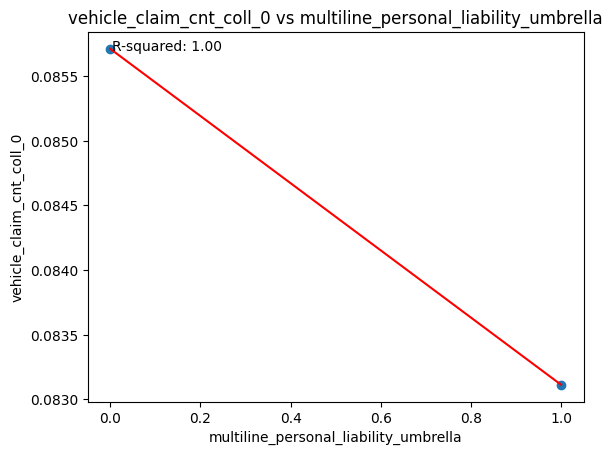


Variable: multiline_rental


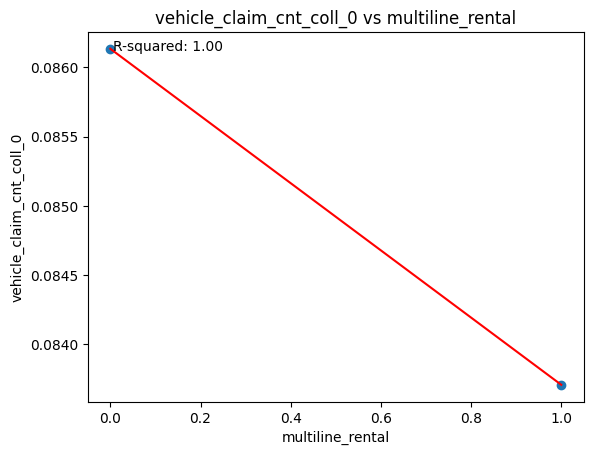


Variable: vehicle_count


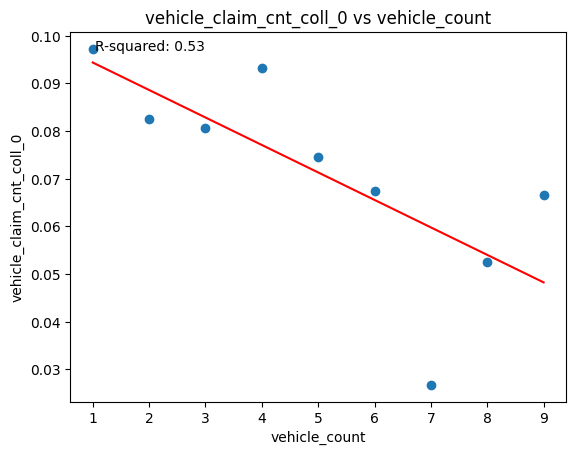


Variable: vehicle_claim_time_since_all


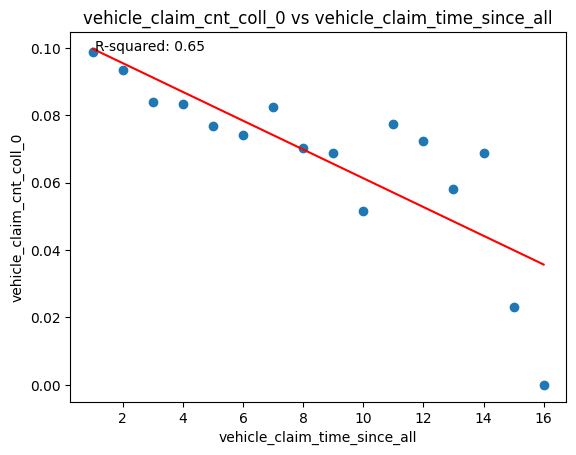


Variable: driver_count


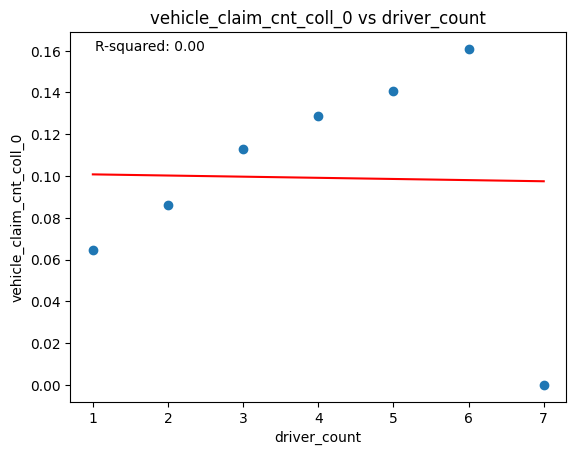


Variable: coverage_bi


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


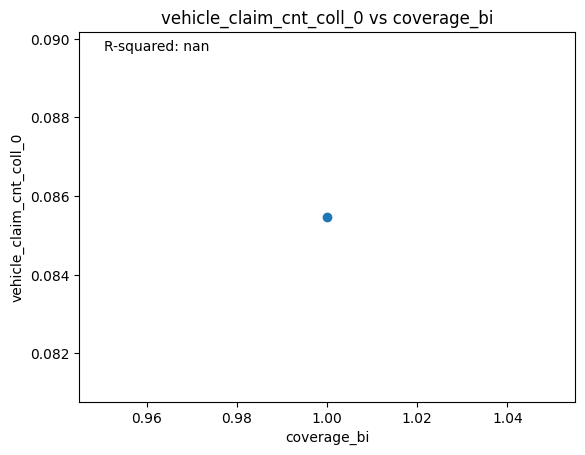


Variable: coverage_coll


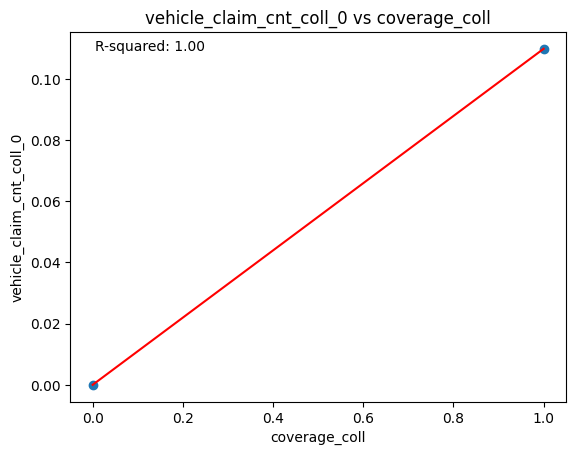


Variable: coverage_comp


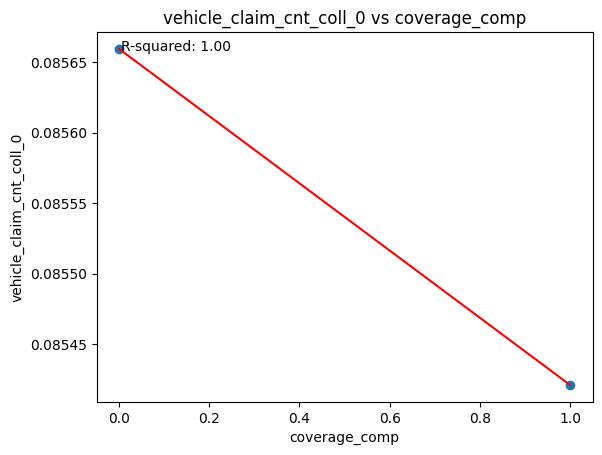


Variable: coverage_ers


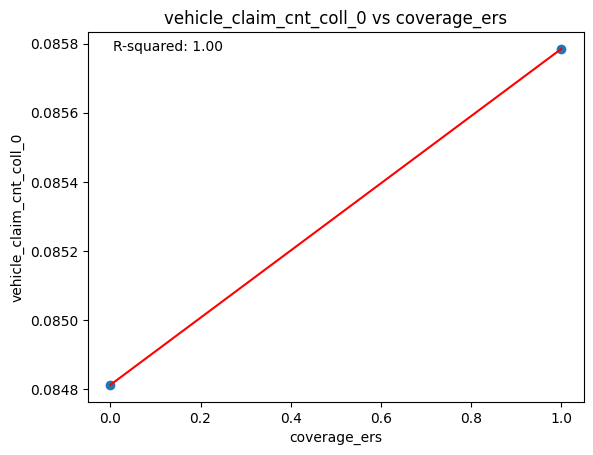


Variable: coverage_mpc


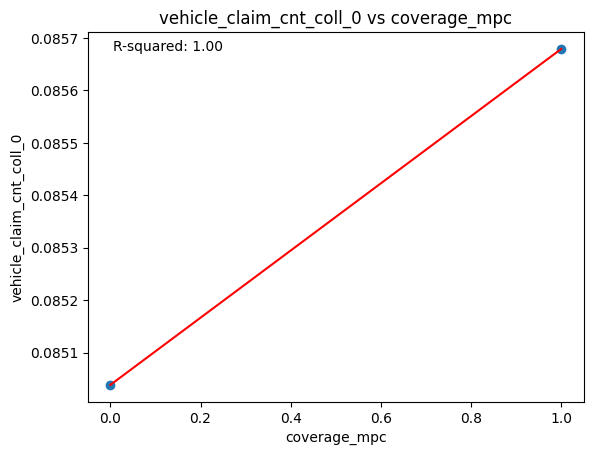


Variable: coverage_pd


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


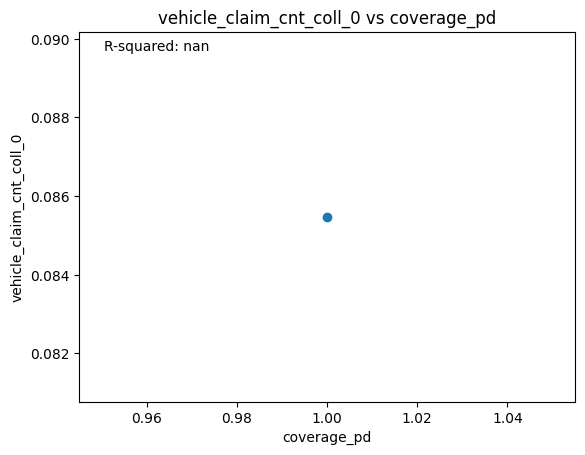


Variable: coverage_ubi


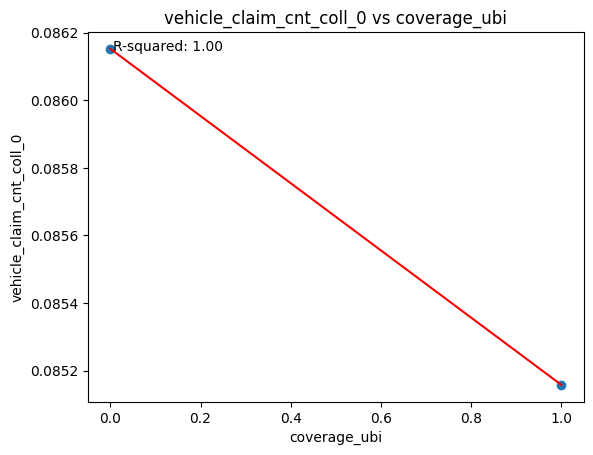

Target: vehicle_claim_cnt_bi_0

Variable: vehicle_age


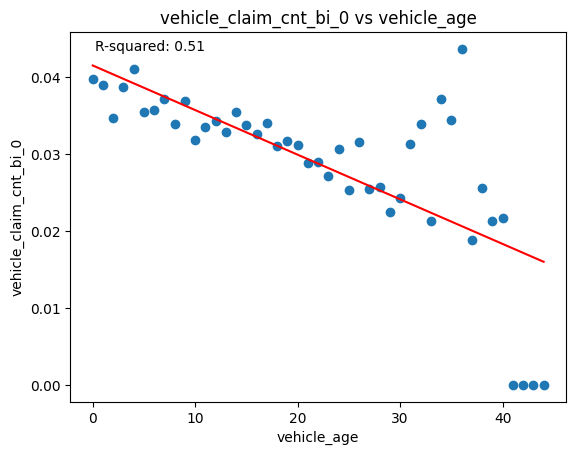


Variable: annual_mileage


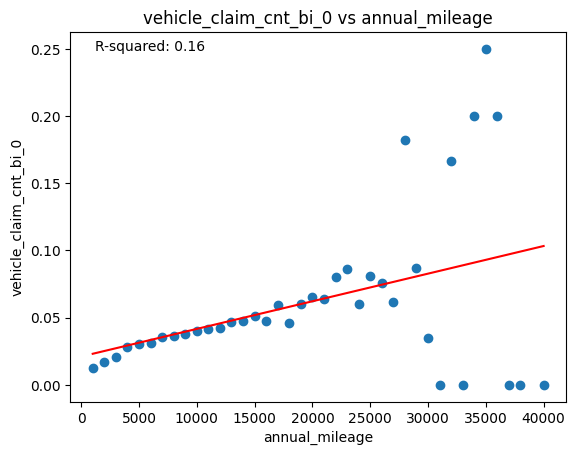


Variable: max_driver_age


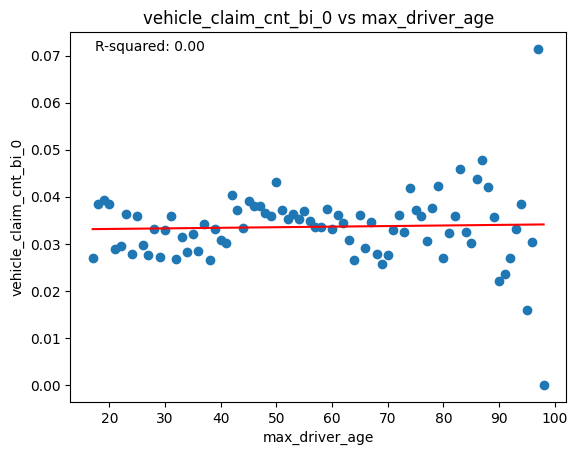


Variable: min_driver_age


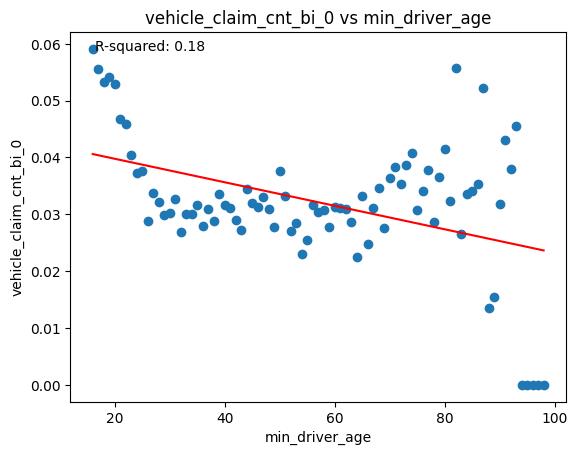


Variable: mean_driver_age


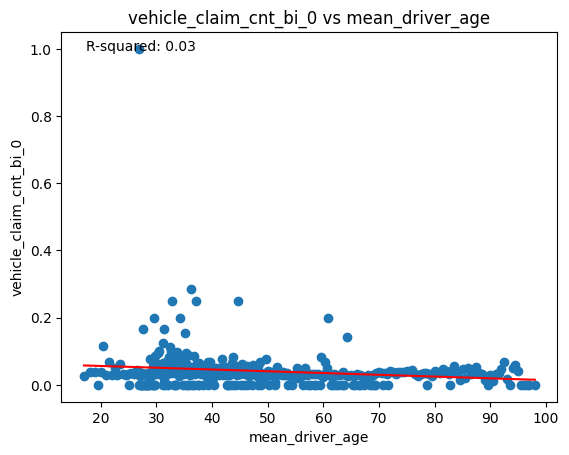


Variable: min_driver_tenure


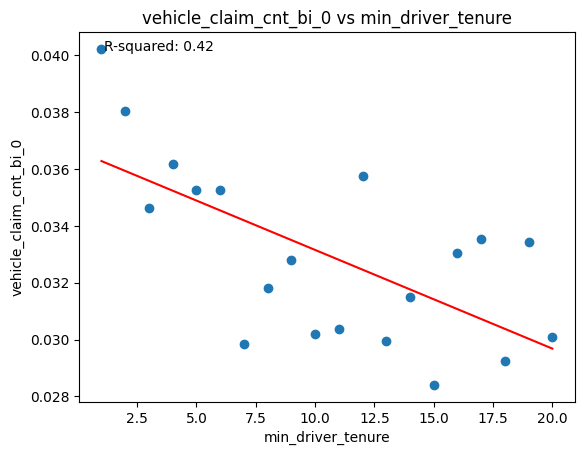


Variable: youthful_driver_count


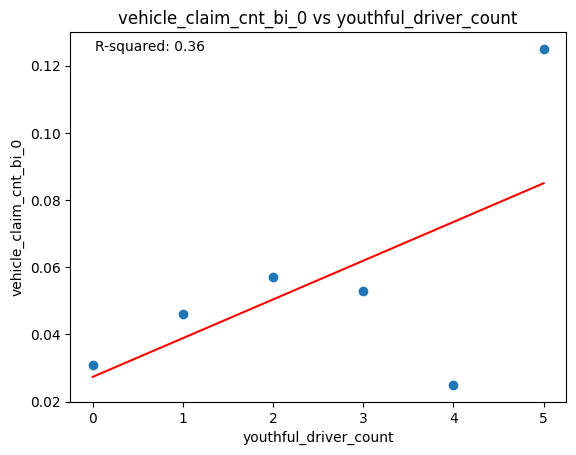


Variable: credit_score


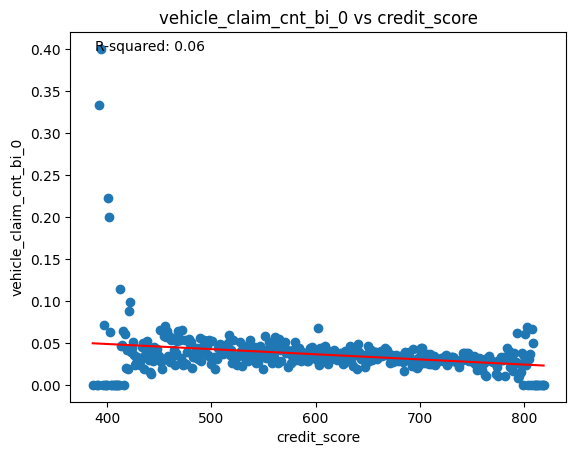


Variable: household_tenure


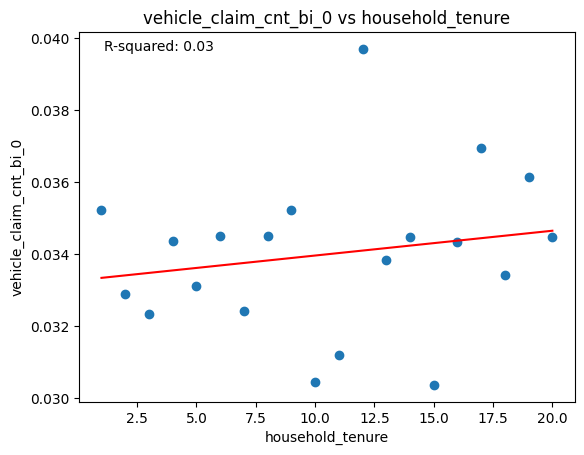


Variable: multiline_houses


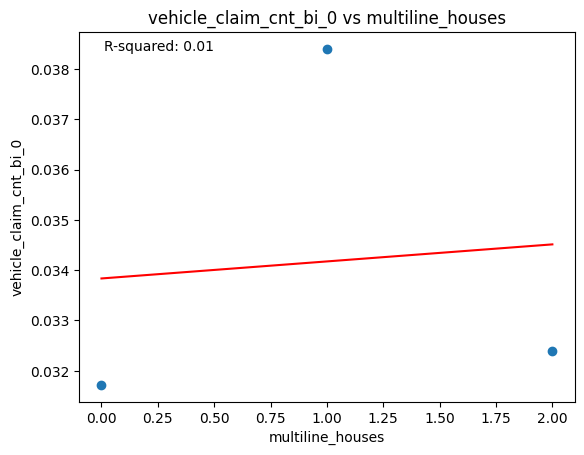


Variable: multiline_personal_article_policy


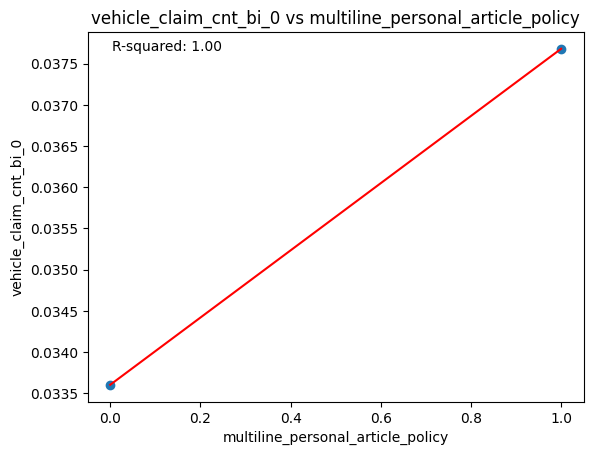


Variable: multiline_personal_liability_umbrella


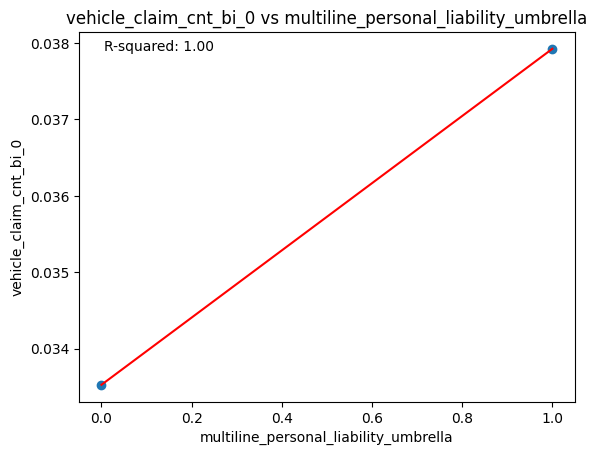


Variable: multiline_rental


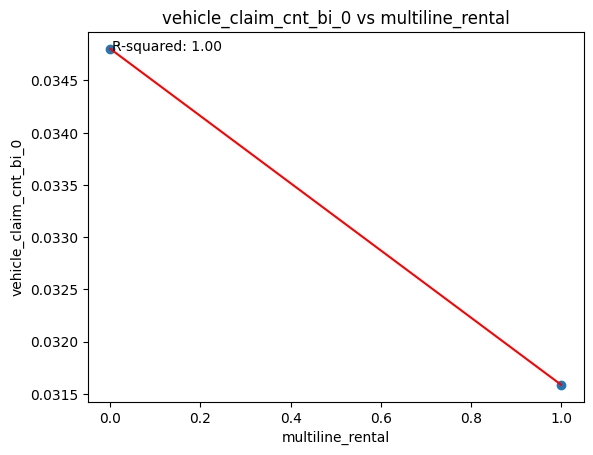


Variable: vehicle_count


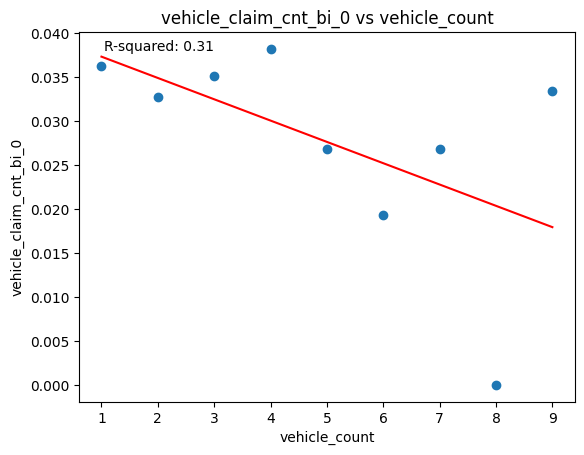


Variable: vehicle_claim_time_since_all


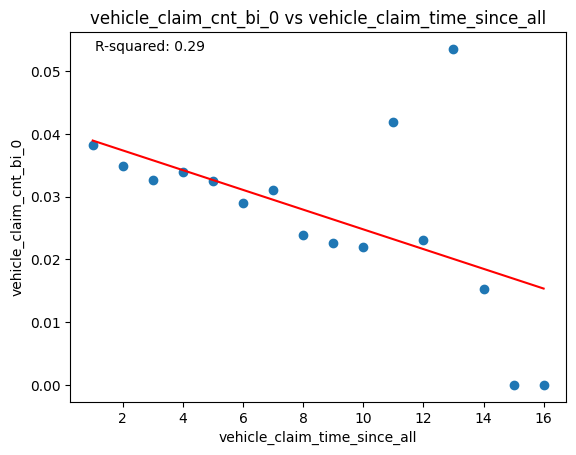


Variable: driver_count


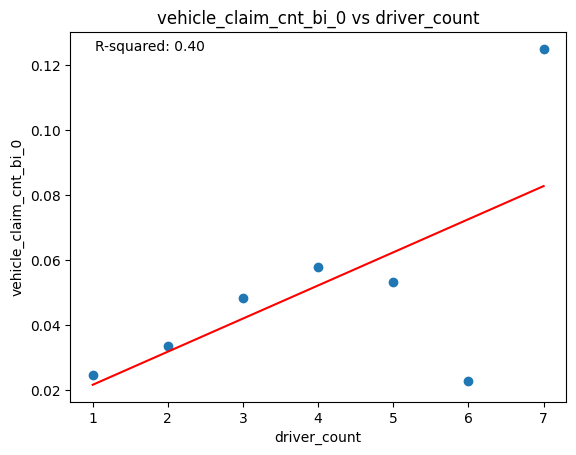


Variable: coverage_bi


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


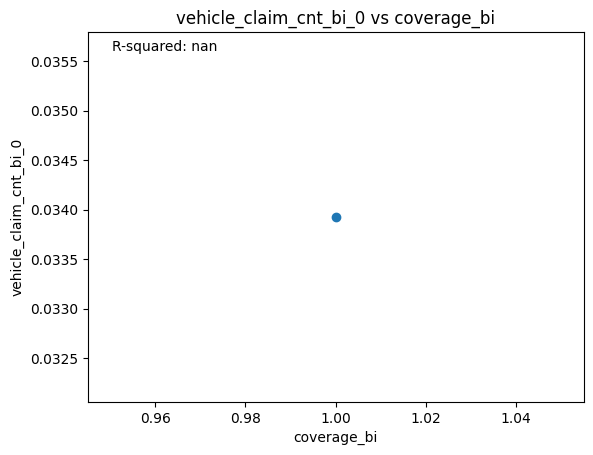


Variable: coverage_coll


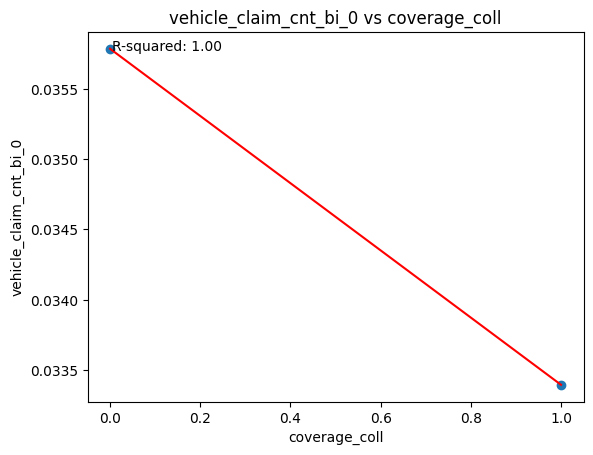


Variable: coverage_comp


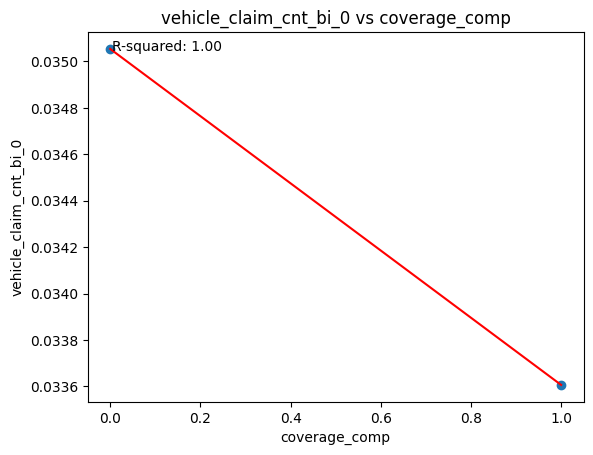


Variable: coverage_ers


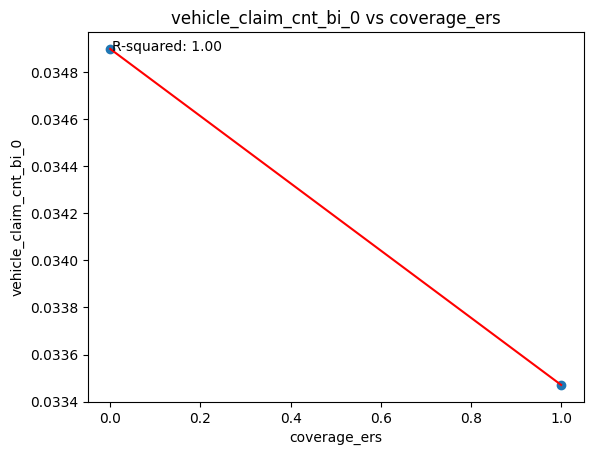


Variable: coverage_mpc


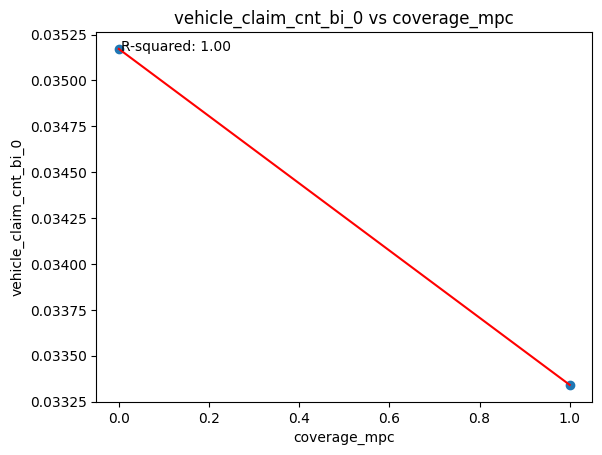


Variable: coverage_pd


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


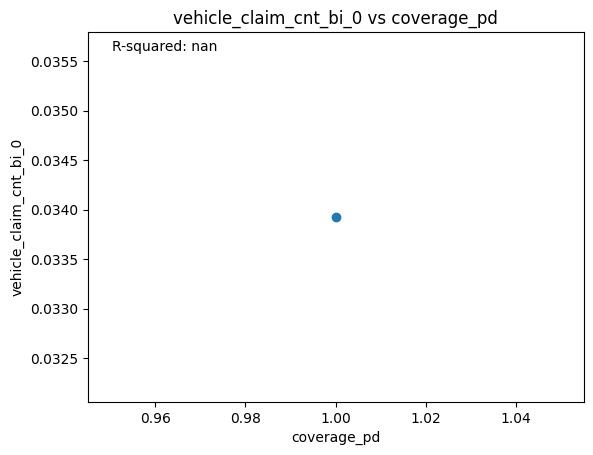


Variable: coverage_ubi


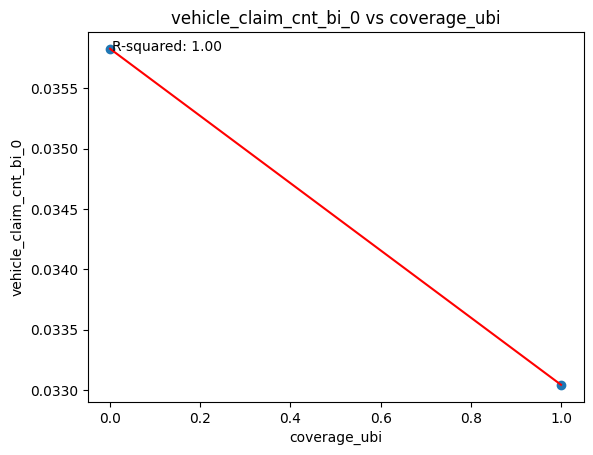

Target: vehicle_claim_cnt_comp_0

Variable: vehicle_age


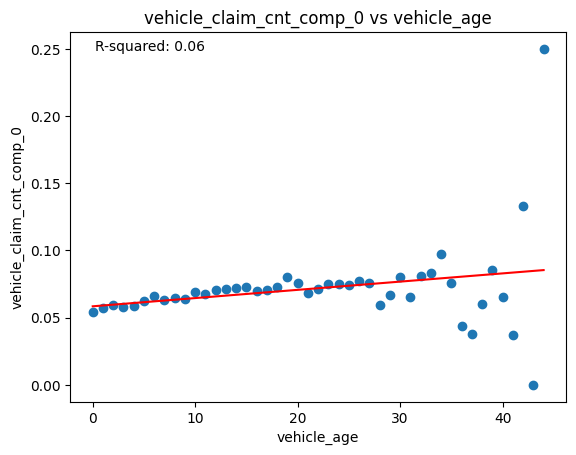


Variable: annual_mileage


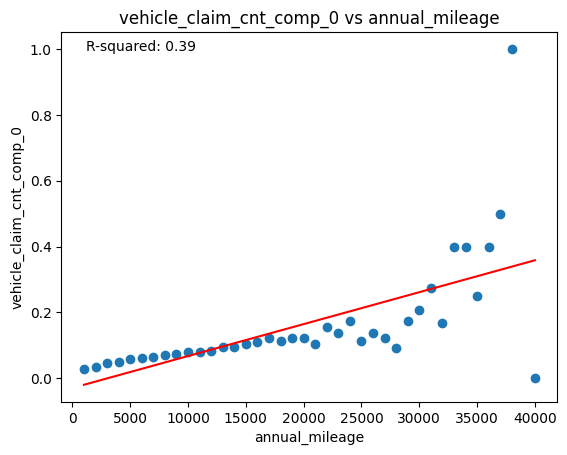


Variable: max_driver_age


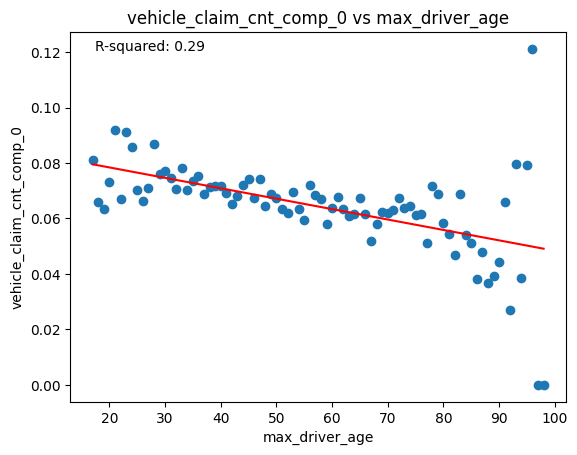


Variable: min_driver_age


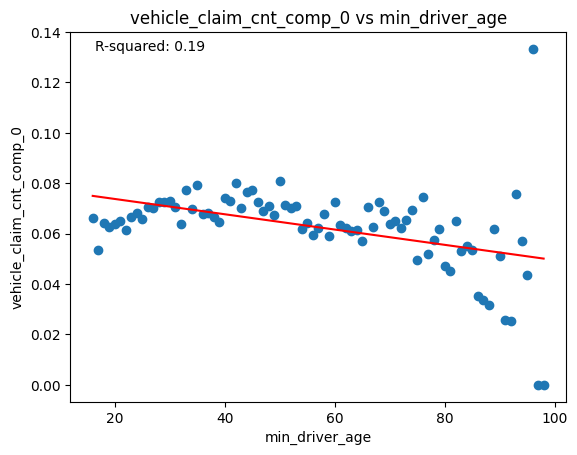


Variable: mean_driver_age


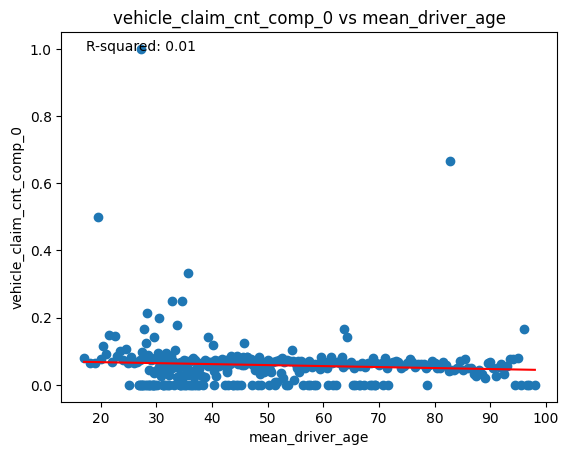


Variable: min_driver_tenure


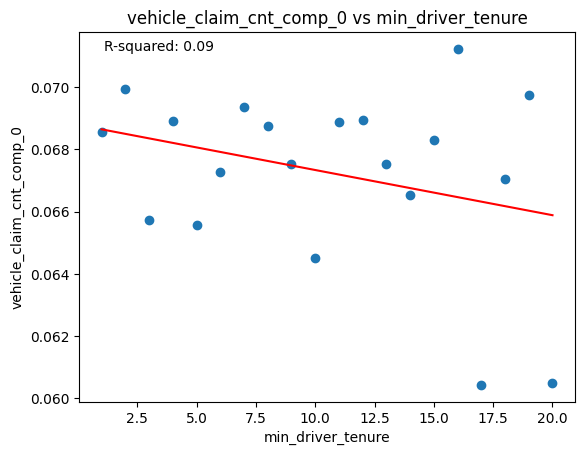


Variable: youthful_driver_count


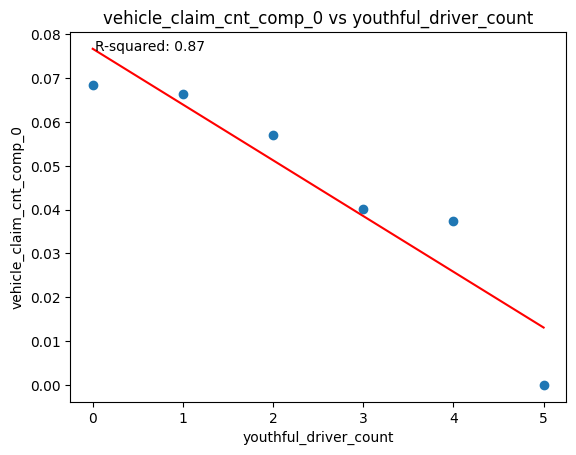


Variable: credit_score


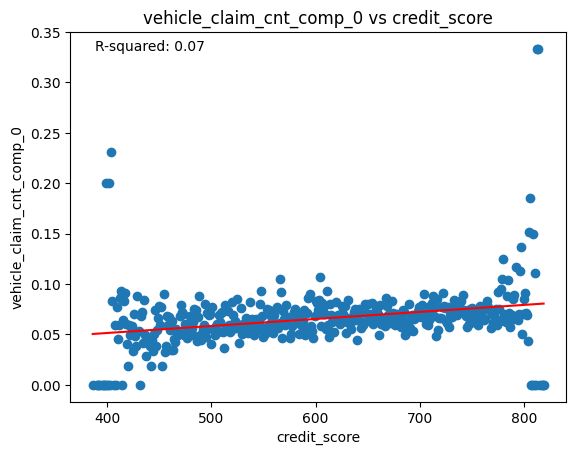


Variable: household_tenure


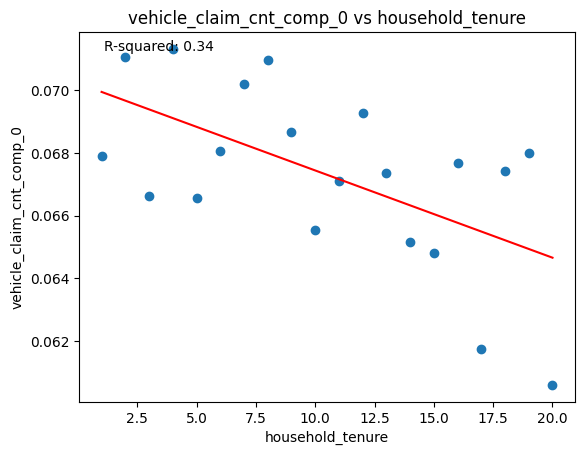


Variable: multiline_houses


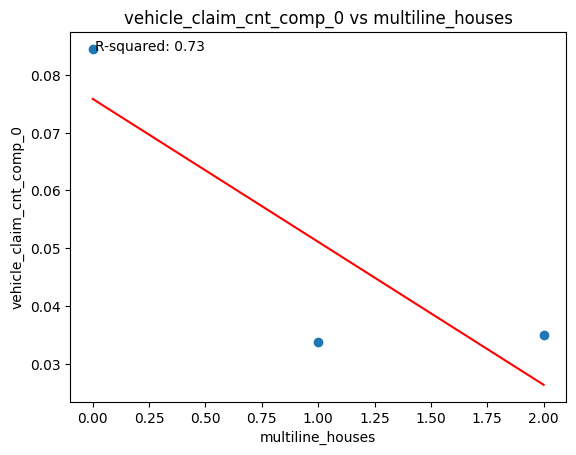


Variable: multiline_personal_article_policy


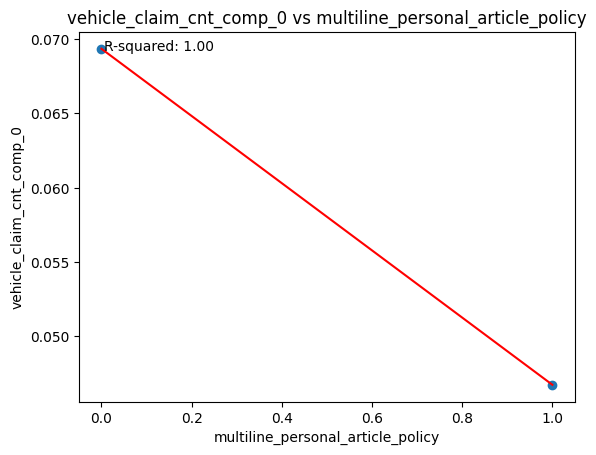


Variable: multiline_personal_liability_umbrella


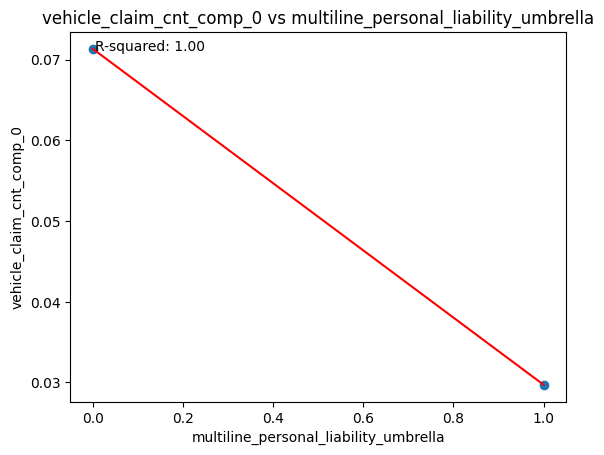


Variable: multiline_rental


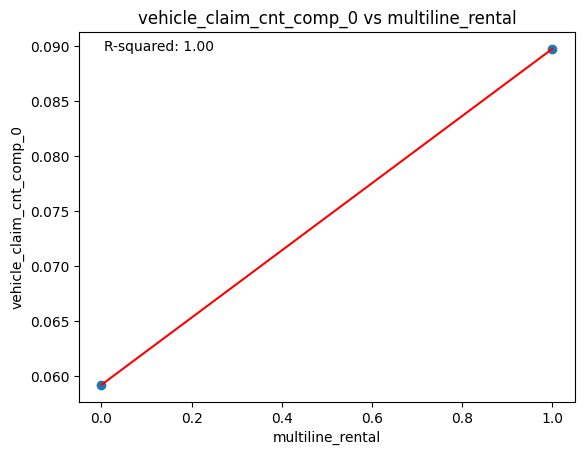


Variable: vehicle_count


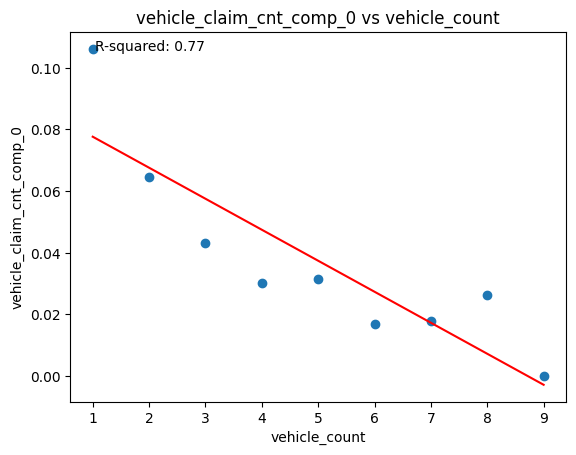


Variable: vehicle_claim_time_since_all


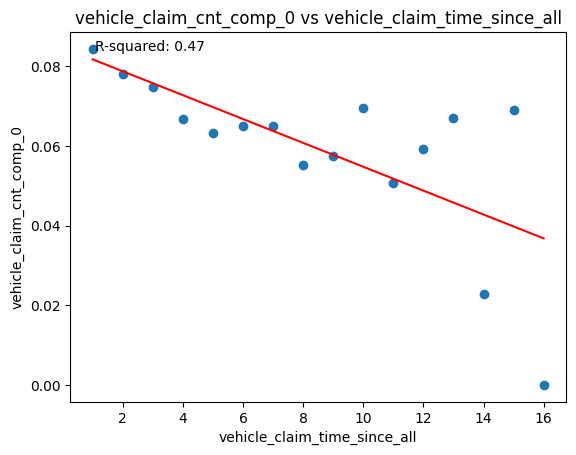


Variable: driver_count


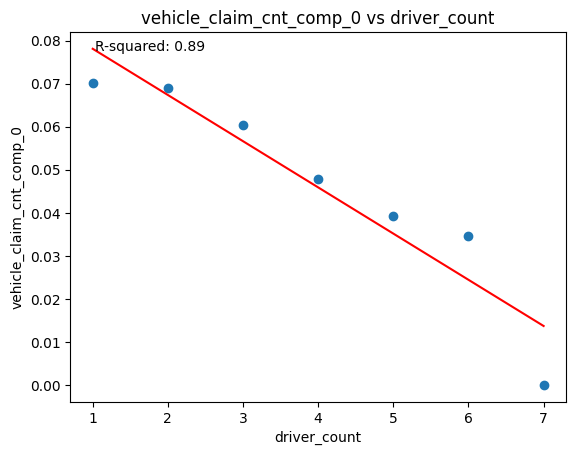


Variable: coverage_bi


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


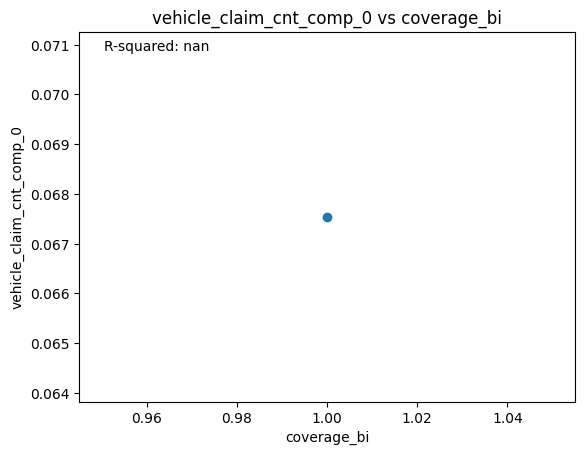


Variable: coverage_coll


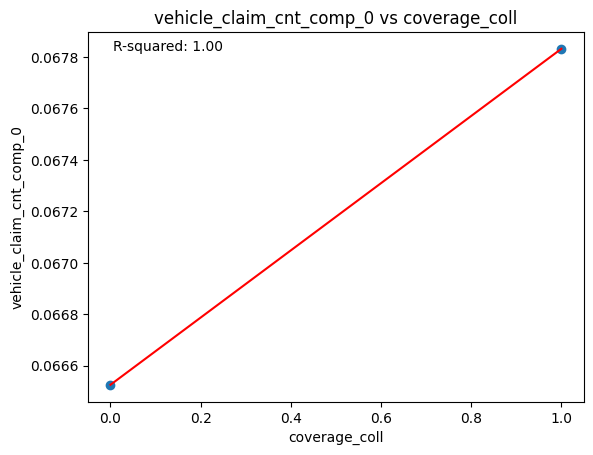


Variable: coverage_comp


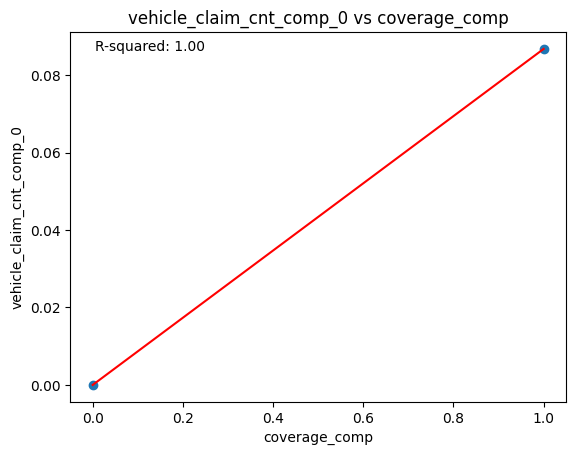


Variable: coverage_ers


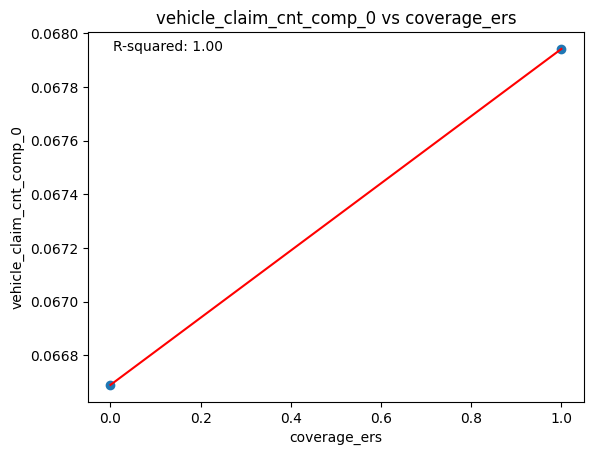


Variable: coverage_mpc


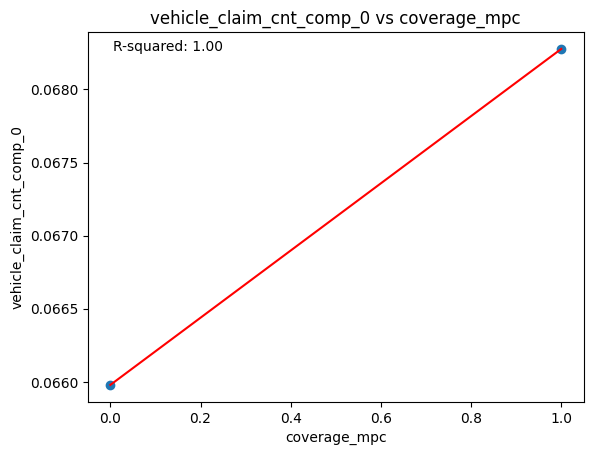


Variable: coverage_pd


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


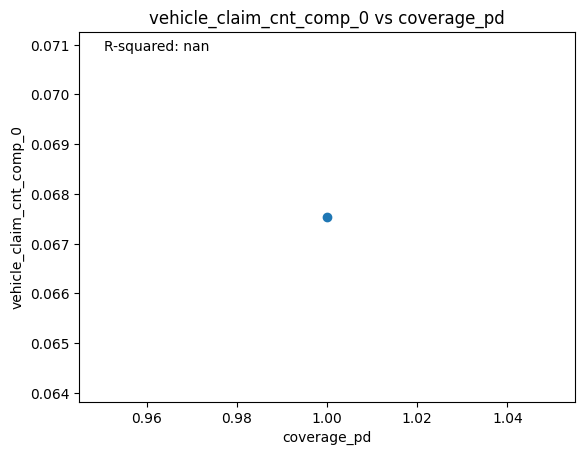


Variable: coverage_ubi


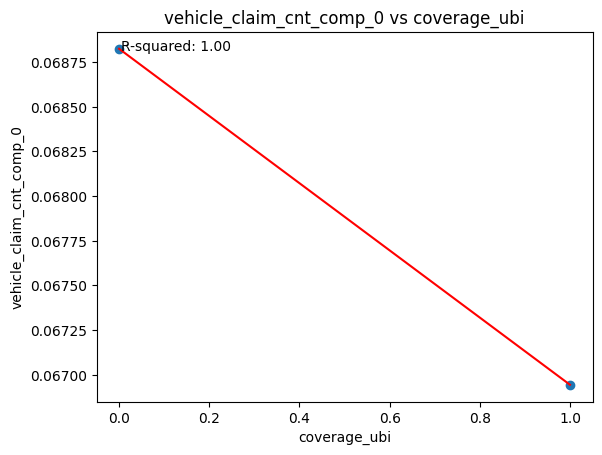

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assume df is your DataFrame, targets is a list of target variables, and vars is a list of feature variables
for target in targets:
  print(f"Target: {target}")
  for var in vars:
    if np.issubdtype(train_df[var].dtype, np.number):
      print(f"\nVariable: {var}")
    
      # Group the data by the values of var, and aggregate the mean of target for each group
      grouped = train_df.groupby(var)[[target]].agg(['mean']).reset_index()

      # Calculate the regression line
      x = grouped[var].values.reshape(-1, 1)
      y = grouped[target]['mean'].values.reshape(-1, 1)
      reg = LinearRegression().fit(x, y)

      # Calculate R-squared
      r2 = reg.score(x, y)

      # Create scatter plot
      plt.scatter(x=grouped[var], y=grouped[target]['mean'])

      # Add regression line to the plot
      plt.plot(x, reg.predict(x), color='red')

      # Add R-squared value to the plot
      plt.text(0.05, 0.95, f"R-squared: {r2:.2f}", transform=plt.gca().transAxes)

      # Set plot title and axis labels
      plt.title(f"{target} vs {var}")
      plt.xlabel(var)
      plt.ylabel(target)

      # Show the plot
      plt.show()


In [12]:
def find_nan_cols(df):
    null = df.isnull().sum()
    missing_df = pd.concat([null], axis=1, keys=['nancount'])

    return missing_df[(missing_df.nancount > 0)]

In [13]:
train_null = find_nan_cols(train_df)
test_null = find_nan_cols(test_df)
print('missing value in train_df -----------------------------')
print(train_null)
print('missing value in test_df ------------------------------')
print(test_null)

missing value in train_df -----------------------------
                              nancount
vehicle_claim_time_since_all    108701
missing value in test_df ------------------------------
                              nancount
vehicle_claim_time_since_all     31183


In [14]:
train_df = train_df.fillna(method='pad')
test_df = test_df.fillna(method='pad')
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())

1
1


In [15]:
train_null = find_nan_cols(train_df)
test_null = find_nan_cols(test_df)
print('🚩 missing value in train_df -----------------------------')
print(train_null)
print('🚩 missing value in test_df ------------------------------')
print(test_null)

🚩 missing value in train_df -----------------------------
                              nancount
vehicle_claim_time_since_all         1
🚩 missing value in test_df ------------------------------
                              nancount
vehicle_claim_time_since_all         1


In [16]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [17]:
train_null = find_nan_cols(train_df)
test_null = find_nan_cols(test_df)
print('🚩 missing value in train_df -----------------------------')
print(train_null)
print('🚩 missing value in test_df ------------------------------')
print(test_null)

🚩 missing value in train_df -----------------------------
Empty DataFrame
Columns: [nancount]
Index: []
🚩 missing value in test_df ------------------------------
Empty DataFrame
Columns: [nancount]
Index: []


In [18]:
import statsmodels.api as sm

print('origint_train_df.shape()', train_df.shape)
train_df_ohe = pd.get_dummies(train_df)
print('train_df_ohe.shape()', train_df_ohe.shape)
train_df_ohe.head()

print('origint_test_df.shape()', test_df.shape)
test_df_ohe = pd.get_dummies(test_df)
print('test_df_ohe.shape()', test_df_ohe.shape)
test_df_ohe.head()

origint_train_df.shape() (220382, 29)
train_df_ohe.shape() (220382, 35)
origint_test_df.shape() (63651, 29)
test_df_ohe.shape() (63651, 35)


,vehicle_claim_cnt_all_0,vehicle_claim_cnt_coll_0,vehicle_claim_cnt_bi_0,vehicle_claim_cnt_comp_0,vehicle_age,annual_mileage,max_driver_age,min_driver_age,mean_driver_age,min_driver_tenure,...,coverage_pd,coverage_ubi,vehicle_type_pickup,vehicle_type_sedan,vehicle_type_sports car,vehicle_type_suv,vehicle_type_van,garaging_location_country,garaging_location_downtown,garaging_location_suburb
1,0,0,0,0,12,9000.0,44,40,42.000000,6,...,1,1,0,0,0,0,1,1,0,0
2,1,0,0,0,9,9000.0,66,62,64.000000,18,...,1,1,0,0,0,0,1,0,1,0
3,0,0,0,0,14,14000.0,49,47,48.000000,12,...,1,1,0,1,0,0,0,0,0,1
4,2,0,0,2,13,12000.0,55,17,41.333333,2,...,1,0,0,0,0,0,1,0,0,1
5,1,0,0,1,27,9000.0,40,36,38.000000,12,...,1,0,1,0,0,0,0,0,1,0


<ipython-input-19-4d86122d704b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(the_vehicle_claim_cnt_all_0)


<Axes: xlabel='vehicle_claim_cnt_comp_0', ylabel='Density'>

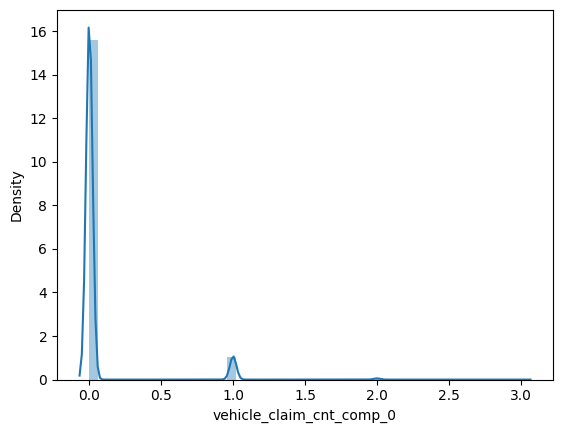

In [19]:
import seaborn as sns

the_vehicle_claim_cnt_all_0 = train_df['vehicle_claim_cnt_comp_0']
sns.distplot(the_vehicle_claim_cnt_all_0)

In [32]:
def stepwise_selection(X, y, criterion='aic', direction='both'):
    """
    Perform stepwise regression and select the best control variables based on the specified criterion.

    Parameters:
        X (array-like): The independent variables.
        y (array-like): The dependent variable.
        criterion (str): The criterion to use for variable selection. Default is 'aic'.
        direction (str): The direction of stepwise regression. Can be 'forward', 'backward', or 'both'. Default is 'both'.

    Returns:
        selected_vars (list): List of indices corresponding to the selected variables.
    """
    # Convert the input data to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Define the initial model with no variables
    current_vars = []
    remaining_vars = list(range(X.shape[1]))

    while remaining_vars:
        # Track the best criterion value and corresponding variable index
        best_criterion = np.inf
        best_var_index = None

        if direction in ('forward', 'both'):
            for var_index in remaining_vars:
                # Add the variable to the current model
                model_vars = current_vars + [var_index]

                # Fit the model and calculate the criterion value
                model = sm.GLM(y, X[:, model_vars], family=sm.families.Poisson())
                fitted_model = model.fit()
                criterion_value = getattr(fitted_model, criterion)

                # Update the best criterion value and corresponding variable index
                if criterion_value < best_criterion:
                    best_criterion = criterion_value
                    best_var_index = var_index

        if direction in ('backward', 'both'):
            for var_index in current_vars:
                # Remove the variable from the current model
                model_vars = current_vars.copy()
                model_vars.remove(var_index)

                # Fit the model and calculate the criterion value
                model = sm.GLM(y, X[:, model_vars], family=sm.families.Poisson())
                fitted_model = model.fit()
                criterion_value = getattr(fitted_model, criterion)

                # Update the best criterion value and corresponding variable index
                if criterion_value < best_criterion:
                    best_criterion = criterion_value
                    best_var_index = var_index

        # Update the current model and remaining variables
        if best_var_index is not None:
            current_vars.append(best_var_index)
            remaining_vars.remove(best_var_index)
        else:
            # No variable improves the criterion, exit the loop
            break

    if len(current_vars) == 0:
        return None

    return current_vars

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, brier_score_loss
from scipy.stats import poisson


targets = ['vehicle_claim_cnt_all_0']

for target in targets:

    vars = ['vehicle_age', 'annual_mileage', 'max_driver_age', 'min_driver_age',\
        'mean_driver_age', 'min_driver_tenure', 'youthful_driver_count', 'credit_score',\
        'household_tenure','multiline_houses', 'multiline_personal_article_policy', \
        'multiline_personal_liability_umbrella', 'multiline_rental', 'vehicle_count','vehicle_claim_time_since_all', \
        'driver_count','coverage_bi','coverage_coll','coverage_comp','coverage_ers','coverage_mpc','coverage_pd','coverage_ubi', \
        'vehicle_type_pickup','vehicle_type_sedan','vehicle_type_sports car','vehicle_type_suv','vehicle_type_van',\
        'garaging_location_country','garaging_location_downtown','garaging_location_suburb'
      ]

    cols_to_keep = [target] + vars

    # Create a copy of the DataFrame
    trainer = train_df_ohe.loc[:, cols_to_keep].copy() 
    tester = test_df_ohe.loc[:, cols_to_keep].copy() 

    trainer.dropna(inplace=True)
    tester.dropna(inplace=True)

    train_x = trainer[vars]
    train_y = trainer[target] 

    test_x = tester[vars]
    test_y = tester[target]    

    # Check if any column has the same value for all rows
    col_to_drop = []
    for col in train_x.columns:
        if train_x[col].nunique() == 1:
            col_to_drop.append(col)

    # Remove the columns with the same value for all rows
    if col_to_drop:
        train_x = train_x.drop(columns=col_to_drop)
        test_x = test_x.drop(columns=col_to_drop)

    # Get column names
    column_names = train_x.columns.tolist()
    
    # Scaling
    standizer = StandardScaler()
    X = standizer.fit_transform(train_x)
    X_test_fit = standizer.fit_transform(test_x)

    final_train = sm.add_constant(X)
    final_test = sm.add_constant(X_test_fit)

    # Check for NaN or infinite values
    print(np.any(np.isnan(final_train)))
    print(np.any(np.isnan(train_y)))
    print(np.any(np.isinf(final_test)))
    print(np.any(np.isinf(test_y)))

    print(final_train.shape)
    print(train_y.shape)
    print(final_test.shape)
    print(test_y.shape)

    full_model = sm.GLM(train_y, final_train, family=sm.families.Poisson())
    fitted_full_model = full_model.fit()

    summary = fitted_full_model.summary2(xname=['Intercept'] + column_names)
    print(summary)      

    # Evaluate the model on the test set
    y_pred = fitted_full_model.predict(final_test)
    mse = mean_squared_error(test_y, y_pred)
    print(f'Mean squared error: {mse}')

    mae = mean_absolute_error(test_y, y_pred)
    mpd = poisson.pmf(test_y, y_pred).mean()  # Mean Poisson Deviance
    auc_score = roc_auc_score(test_y > 0, y_pred, multi_class='ovr')  # AUC score

    print(f'Mean squared error: {mse}')
    print(f'Mean absolute error: {mae}')
    print(f'Mean Poisson Deviance: {mpd}')
    print(f'AUC score: {auc_score}')

False
False
False
False
(220382, 30)
(220382,)
(63651, 30)
(63651,)
                           Results: Generalized linear model
Model:                    GLM                         AIC:                275921.0842  
Link Function:            Log                         BIC:                -2541947.3993
Dependent Variable:       vehicle_claim_cnt_all_0     Log-Likelihood:     -1.3793e+05  
Date:                     2023-05-08 00:25            LL-Null:            -1.4284e+05  
No. Observations:         220382                      Deviance:           1.6909e+05   
Df Model:                 27                          Pearson chi2:       2.17e+05     
Df Residuals:             220354                      Scale:              1.0000       
Method:                   IRLS                                                         
---------------------------------------------------------------------------------------
                                       Coef.  Std.Err.     z     P>|z|   [0.025